In [2]:
import umap
import umap.plot
import matplotlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pydoc import doc
from matplotlib.pyplot import text, title
from top2vec import Top2Vec
import matplotlib
import umap
from specify_texts import textfileNames, metadata

Number of documents after filter: 7048


In [3]:
#Helper function
def getDocumentTCP(documentTitle):
    titleSeries = metadata.Title
    returnedIndices = titleSeries.str.match(documentTitle)
    return (list(returnedIndices).index(True))


In [4]:
#output file parameters
numTopics = 3
numWords = 5
documentID = getDocumentTCP("Leviathan")
documentName = textfileNames[documentID]


In [5]:
modelname = "models/1640_1660_top2vectrained_learn_lemmatized"
model = Top2Vec.load(modelname)

In [6]:
#Writing to file
summaryFile = open(
    f"summaries/document_surroundings_{documentID}.txt", "w")
summaryFile.write(
    "Investigating what's around document number " + str(documentID) + " (" + textfileNames[documentID] + ")" + "..." + "\n\n")
closestTopic = model.get_documents_topics(
    list([documentID]), num_topics=numTopics)
summaryFile.write(
    "----------------------------------------------------------------------------------------------------\n")
summaryFile.write(
    f"Topics - closest topics to {textfileNames[documentID]}, with cosine similarity to document with topic defining words\n")
summaryFile.write("----------------------------------------------------------------------------------------------------\n")
for i in range(0, len(closestTopic[0][0])):
    summaryFile.write(
        f"Topic {closestTopic[0][0][i]} - {closestTopic[1][0][i]} - {closestTopic[2][0][i][0:5]}\n")
summaryFile.write("\n")
summaryFile.write(
    "----------------------------------------------------------------------------------------------------\n")
summaryFile.write(
    f"Words - closest words to {textfileNames[documentID]}, with cosine similarity to document\n")
summaryFile.write(
    "----------------------------------------------------------------------------------------------------\n")
documentVector = model.document_vectors[documentID]
wordsNearDocument = model.search_words_by_vector(
    documentVector, num_words=numWords)
for i in range(0, numWords):
    summaryFile.write(
        f"{wordsNearDocument[0][i]} - {wordsNearDocument[1][i]}\n")


In [28]:
# Exporting vectors to dataframe for UMAP and plotting
model.get_documents_topics(doc_ids = list([0]))[0][0]

documentVectors = pd.DataFrame(model.document_vectors)
documentVectors['id'] = range(0, len(model.document_vectors))
documentVectors['id'] = documentVectors['id'].apply(
    lambda x: int(model.get_documents_topics(doc_ids=list([x]))[0][0]))
documentVectors.head(20)


# topicVectors = pd.DataFrame(model.topic_vectors)
# topicVectors['id'] = range(0, len(model.topic_vectors))
# topicVectors['type'] = np.ones(len(model.topic_vectors))

vectorData = documentVectors
# vectorData = pd.concat(list([documentVectors, topicVectors]))


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,id
0,0.006239,0.108755,0.028144,-0.039700,-0.020708,0.073761,0.006150,0.082278,0.051092,-0.027631,...,0.045037,0.059502,-0.110344,-0.075717,0.005377,-0.029851,-0.031947,-0.067093,0.038646,23
1,-0.040681,0.106675,0.081095,0.016871,-0.027409,-0.010506,-0.000414,0.048290,0.037379,0.021353,...,0.136945,-0.035783,-0.072609,-0.137553,0.046372,0.039331,-0.047780,0.035727,0.095517,23
2,0.058585,0.050676,0.079329,0.040202,-0.024482,0.013211,-0.067363,0.029392,0.038970,-0.035896,...,0.117348,-0.047460,-0.107322,-0.100498,0.066040,-0.015632,0.026510,-0.043487,0.083754,23
3,0.065346,0.153267,0.031105,-0.015772,-0.149144,0.042300,-0.013658,-0.034286,0.049316,0.017983,...,-0.013395,0.030107,-0.084647,-0.094020,-0.091913,0.009262,0.062298,-0.067513,0.086047,42
4,0.011755,0.040900,-0.060760,0.007423,0.057486,0.067712,-0.047553,-0.010978,0.032877,0.004769,...,-0.050445,0.045055,0.053085,-0.040255,-0.022171,-0.068661,-0.038235,0.009020,-0.043052,22


In [8]:
mapper = umap.UMAP().fit(vectorData.loc[:, 0:299])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([], [])

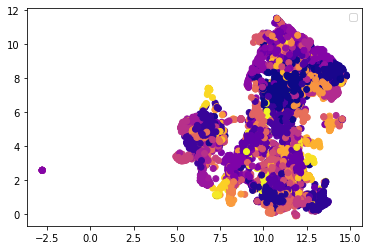

In [35]:
# dir(mapper)
reducedVectors = pd.DataFrame(mapper.embedding_)
reducedVectors.head(5)

fig  = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x = reducedVectors[0], y = reducedVectors[1], c = vectorData.id, cmap="plasma")
ax.legend()
ax.get_legend_handles_labels()

# matplotlibObject = umap.plot.plt
# dir(matplotlibObject)

<AxesSubplot:>

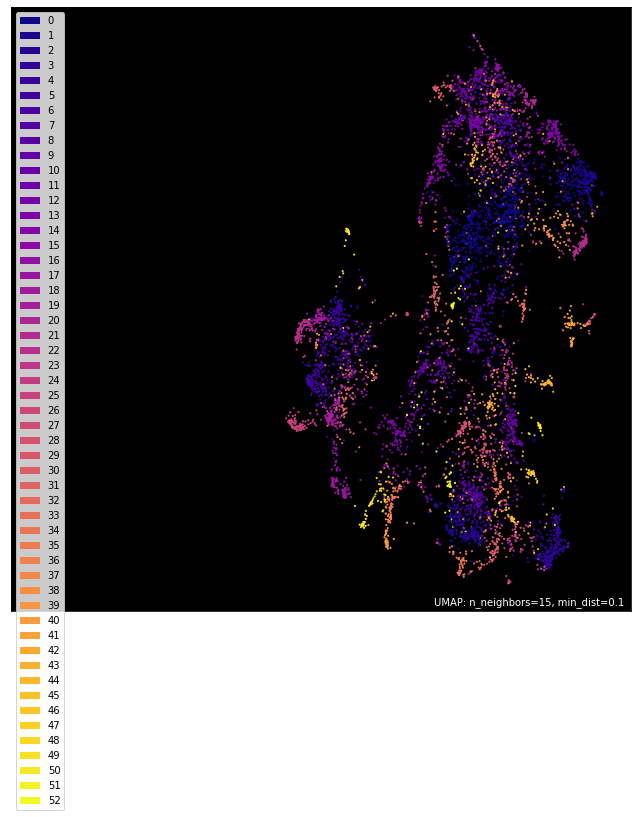

In [27]:
umap.plot.points(mapper, labels=vectorData.id, color_key_cmap='plasma', background="black")